# NLP – Sentiment Classification on User Feedbacks

## Objectifs
- Transformer les textes en représentations numériques
- Entraîner des modèles de classification NLP
- Comparer plusieurs approches
- Évaluer les performances des modèles


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("../data/feedbacks_enriched.csv")

df.head()


,Review,Rating,text_length,clean_text,text_sentiment,rating_sentiment,coherent
0,nice hotel expensive parking got good deal sta...,4,593,nice hotel expensive parking got good deal sta...,positive,positive,True
1,ok nothing special charge diamond member hilto...,2,1689,nothing special charge diamond member hilton d...,positive,negative,False
2,nice rooms not 4* experience hotel monaco seat...,3,1427,nice room experience hotel monaco seattle good...,positive,neutral,False
3,"unique, great stay, wonderful time hotel monac...",5,600,unique great stay wonderful time hotel monaco ...,positive,positive,True
4,"great stay great stay, went seahawk game aweso...",5,1281,great stay great stay went seahawk game awesom...,positive,positive,True


In [4]:
X = df["clean_text"]
y = df["text_sentiment"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
#TF-IDF Vectorization
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

y_pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))


Logistic Regression
              precision    recall  f1-score   support

    negative       0.83      0.43      0.56       214
     neutral       0.00      0.00      0.00        16
    positive       0.97      1.00      0.98      3869

    accuracy                           0.96      4099
   macro avg       0.60      0.47      0.51      4099
weighted avg       0.95      0.96      0.95      4099



/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [8]:
#linear SVM
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("Linear SVM")
print(classification_report(y_test, y_pred_svm))


Linear SVM
              precision    recall  f1-score   support

    negative       0.80      0.63      0.70       214
     neutral       0.00      0.00      0.00        16
    positive       0.98      0.99      0.98      3869

    accuracy                           0.97      4099
   macro avg       0.59      0.54      0.56      4099
weighted avg       0.96      0.97      0.97      4099



/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [9]:
#naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))


Naive Bayes
              precision    recall  f1-score   support

    negative       0.77      0.09      0.17       214
     neutral       0.00      0.00      0.00        16
    positive       0.95      1.00      0.97      3869

    accuracy                           0.95      4099
   macro avg       0.57      0.36      0.38      4099
weighted avg       0.94      0.95      0.93      4099



/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [10]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Linear SVM", "Naive Bayes"],
    "F1-Score": [
        classification_report(y_test, y_pred_lr, output_dict=True)["weighted avg"]["f1-score"],
        classification_report(y_test, y_pred_svm, output_dict=True)["weighted avg"]["f1-score"],
        classification_report(y_test, y_pred_nb, output_dict=True)["weighted avg"]["f1-score"]
    ]
})

results


/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sakkarouis/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

,Model,F1-Score
0,Logistic Regression,0.954237
1,Linear SVM,0.966291
2,Naive Bayes,0.927157


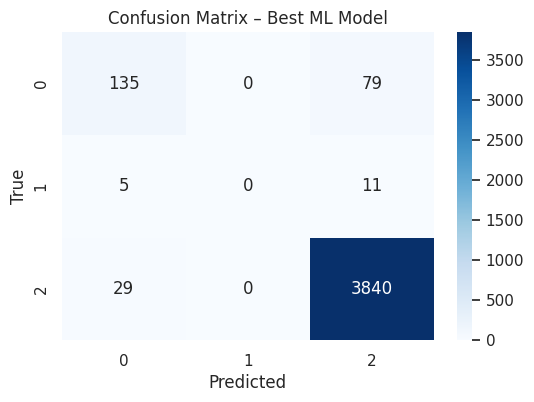

In [11]:
best_pred = y_pred_svm  

cm = confusion_matrix(y_test, best_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Best ML Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df["vader_sentiment"] = df["clean_text"].apply(vader_sentiment)

df[["clean_text", "rating_sentiment", "vader_sentiment"]].head()


,clean_text,rating_sentiment,vader_sentiment
0,nice hotel expensive parking got good deal sta...,positive,positive
1,nothing special charge diamond member hilton d...,negative,positive
2,nice room experience hotel monaco seattle good...,neutral,positive
3,unique great stay wonderful time hotel monaco ...,positive,positive
4,great stay great stay went seahawk game awesom...,positive,positive


In [13]:
#Analyse qualitative : ML vs VADER
comparison = df.loc[X_test.index][
    ["clean_text", "rating_sentiment", "vader_sentiment"]
]

comparison.head(10)


,clean_text,rating_sentiment,vader_sentiment
16818,excellent location block placa catalunya pro e...,positive,positive
10075,comfy enjoyable stay room family room comfy de...,neutral,positive
16699,hotel europa gem family stayed hotel europa ni...,positive,positive
19467,loved palace stayed palace feb time punta cana...,positive,positive
4082,great value great location junior suite small ...,positive,positive
2168,great place stay breakfast wonderful location ...,positive,positive
8326,good hotel spent day royal march location exce...,positive,positive
18515,great resort mediocre food arrival puj fastest...,neutral,positive
4908,great hotel great location stayed week hotel a...,positive,positive
18917,ocean blue excellent resort boyfriend mid stay...,positive,positive


In [14]:
comparison["disagreement"] = (
    comparison["rating_sentiment"] != comparison["vader_sentiment"]
)

comparison["disagreement"].value_counts(normalize=True) * 100


disagreement
False    78.14101
True     21.85899
Name: proportion, dtype: float64

78.1 % des feedbacks → cohérents

le sentiment VADER ≈ sentiment dérivé du rating

21.9 % des feedbacks → incohérents

le texte exprime un sentiment différent de la note donnée

--->Environ 1 feedback sur 5 est incohérent.

Les résultats montrent qu’environ 22 % des feedbacks présentent une incohérence entre le sentiment exprimé dans le texte et le rating numérique, ce qui confirme que le rating ne constitue pas toujours une annotation fiable du sentiment.

In [15]:
comparison[comparison["disagreement"] == True].head(10)

,clean_text,rating_sentiment,vader_sentiment,disagreement
10075,comfy enjoyable stay room family room comfy de...,neutral,positive,True
18515,great resort mediocre food arrival puj fastest...,neutral,positive,True
4926,good hotel short stay city centre convenient l...,neutral,positive,True
9088,boring institutionalised far town trendy artwo...,neutral,negative,True
19534,absolutely choice time square hotwire rate hot...,negative,positive,True
14533,good location saw bad review trip adviser pres...,neutral,positive,True
14008,hear stayed marina barcelona night week tamari...,neutral,negative,True
19000,business like stayed business week march hotel...,neutral,positive,True
12225,new year westin sydney previously pointed memb...,neutral,positive,True
11005,like dating supermodel yes beautiful hotel asi...,negative,positive,True


## Interprétation

- Les modèles ML sont évalués par rapport au sentiment dérivé du rating
- VADER n’est pas utilisé comme vérité terrain mais comme outil d’analyse
- Des désaccords significatifs existent entre VADER et le rating
- Cela confirme que le rating n’est pas toujours un proxy fiable du sentiment textuel


In [16]:
import joblib

joblib.dump(svm, "../models/sentiment_model.pkl")
joblib.dump(tfidf, "../models/tfidf_vectorizer.pkl")


['../models/tfidf_vectorizer.pkl']

## Conclusion

Ce notebook a permis :
- d’entraîner des modèles NLP supervisés
- d’évaluer leurs performances sans fuite de données
- d’utiliser VADER uniquement comme outil exploratoire
- de mettre en évidence les limites du rating comme annotation du sentiment

Le modèle retenu sera intégré dans l’application Streamlit.
